In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [12]:
Y = Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [13]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [14]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

c:\Users\sripr\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [18]:
scaler_Y.inverse_transform(regressor.predict(scaler_X.transform([[6.5]])).reshape(-1,1))

array([[252789.13921624]])

Text(0, 0.5, 'Salary')

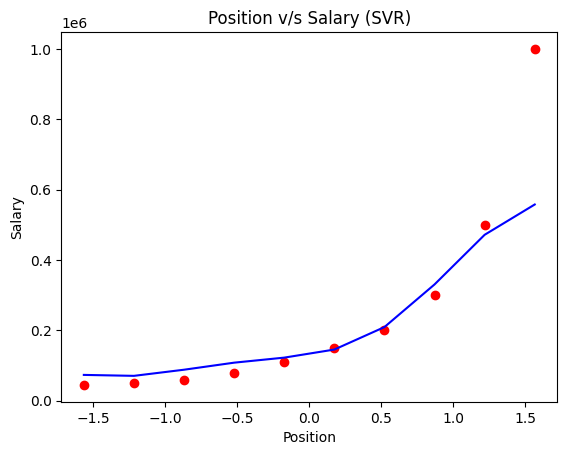

In [22]:
plt.scatter(scaler_X.inverse_transform(X), scaler_Y.inverse_transform(Y),color = "red")
plt.plot(scaler_X.inverse_transform(X),scaler_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = "blue")
plt.title("Position v/s Salary (SVR)")
plt.xlabel("Position")
plt.ylabel("Salary")


C:\Users\sripr\AppData\Local\Temp\ipykernel_75796\3918626997.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(scaler_X.inverse_transform(X)),max(scaler_X.inverse_transform(X)),0.1)


Text(0, 0.5, 'Salary')

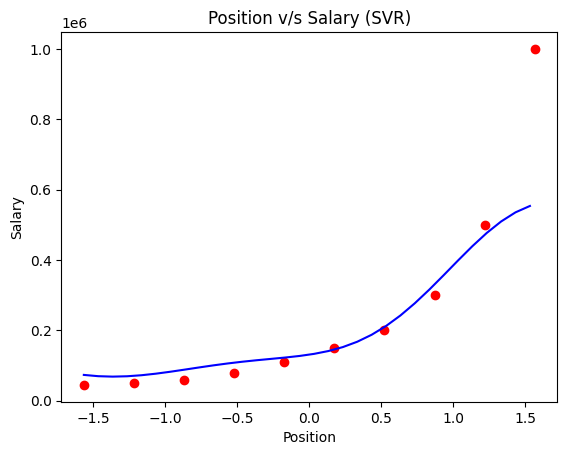

In [24]:
X_grid = np.arange(min(scaler_X.inverse_transform(X)),max(scaler_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(scaler_X.inverse_transform(X), scaler_Y.inverse_transform(Y),color = "red")
plt.plot(X_grid,scaler_Y.inverse_transform(regressor.predict(scaler_X.inverse_transform(X_grid)).reshape(-1,1)), color = "blue")
plt.title("Position v/s Salary (SVR)")
plt.xlabel("Position")
plt.ylabel("Salary")